Introduction:

In this research project, the goal is to detect Parkinson’s disease using machine learning methods, with a focus on voice data as key features from the Parkinson's dataset. The study involves developing predictive models using K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) algorithms to classify individuals as diagnosed or not diagnosed with Parkinson’s disease based on voice patterns.

We will utilize the Parkinson's dataset for this purpose. This dataset includes various voice attributes such as MDVP
(Hz), MDVP(Hz), MDVP(Hz), MDVP(%), MDVP(Abs), MDVP, MDVP, Jitter, MDVP, MDVP(dB), Shimmer, Shimmer, MDVP, Shimmer, NHR, HNR, RPDE, DFA, spread1, spread2, D2, PPE, and a status label indicating whether the participant is diagnosed with Parkinson’s. The data is contained in the file named "parkinsons_data.csv".


In [118]:
from __future__ import print_function
import os
#Please set the path below as per your system data folder location
data_path = ['C:/Users/pavan/OneDrive/Documents/Pavan/Machine_Learning/Research Paper']

Perform following steps on data set

Import the data.
Create features and label data sets.
Apply minmax scaler on features data.
Split the data into train and test using train_test_split model

In [120]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['parkinsons_data.csv'])
data = pd.read_csv(filepath, sep=',')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


Count of diagnosed participants vs. undiagnosed participants based on the status column (1 represents diagnosed and 0 represents undiagnosed)

In [122]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
status                int64
dtype: object

In [123]:
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [124]:
features = data.iloc[:,:-1].values[:,1:] # As name object column is not required for diagnosis. Hence droping the column
labels = data['status'].values

K-nearest neighbors requires scaled data so using MinMax scaler scaling method discussed on the data set

In [126]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

Apply MinMaxScaler on featrue data

In [128]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(features)
y=labels

print(X)

[[-0.63138346 -0.77481654 -0.89037042 ...  0.17153026 -0.21867743
  -0.0053808 ]
 [-0.6033463  -0.81013911 -0.4433544  ...  0.48267409 -0.05370956
   0.34265204]
 [-0.66992292 -0.88174367 -0.46942324 ...  0.37274182 -0.18236124
   0.19336492]
 ...
 [ 0.00546073 -0.43717403 -0.89854572 ... -0.31484696  0.11793486
  -0.63884033]
 [ 0.28578581  0.20361309 -0.89144127 ... -0.09423055 -0.36355605
  -0.67372646]
 [ 0.46654868 -0.35441175 -0.85610326 ... -0.16981039  0.00734563
  -0.5690805 ]]


Divide the dataset into training and testing sets. As label is imbalanced hence used StratifiedShuffleSplit instead of train test split

In [130]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


Evaluate the KNN Model with KNeighborsClassifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

The code block evaluates the performance of a K-Nearest Neighbors (KNN) classification model using various metrics from the sklearn.metrics module. It calculates the accuracy of the model, which is the ratio of correct predictions to the total number of predictions. Additionally, it computes precision, recall, and F1-score, providing insight into how well the model handles both false positives and false negatives, especially in imbalanced datasets. The confusion matrix is generated to show the distribution of true positives, true negatives, false positives, and false negatives, offering a visual representation of prediction errors. Lastly, a detailed classification report summarizes precision, recall, F1-score, and support for each class in the dataset, giving a comprehensive overview of the model's classification performance.

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


# Accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)

# Precision, Recall, F1-score
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-Score: {knn_f1:.2f}")

# Confusion Matrix and Classification Report
knn_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", knn_cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9487179487179487
Precision: 0.96
Recall: 0.95
F1-Score: 0.95
Confusion Matrix:
 [[10  0]
 [ 2 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



The code snippet visualizes the KNN model's confusion matrix using a heatmap generated with Seaborn and Matplotlib. The heatmap annotates the matrix values for easy interpretation, where the cells represent true positives, true negatives, false positives, and false negatives.

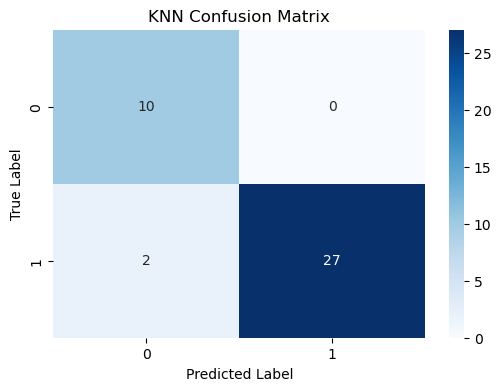

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

This code snippet iterates through a range of values for k (from 1 to 30) to evaluate the performance of the K-Nearest Neighbors (KNN) classifier at different neighborhood sizes. For each value of k, the KNN model is trained on the training set and predictions are made on the test set. The accuracy scores for each k are collected in a list. The results are then visualized in a plot

In [137]:
k_range = range(1, 31)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

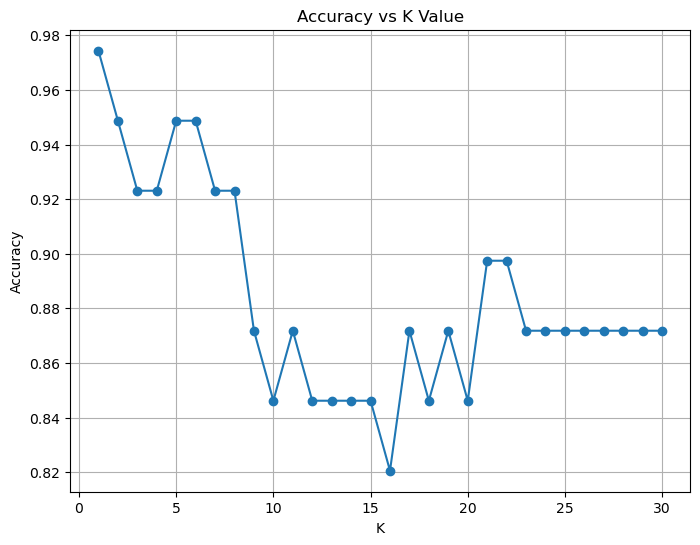

In [138]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, accuracy_scores, marker='o')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

The ROC-AUC curve for the K-Nearest Neighbors (KNN) classifier illustrates the trade-off between the false positive rate and true positive rate, with an area under the curve (AUC), indicating the model's performance in distinguishing between the positive and negative classes.

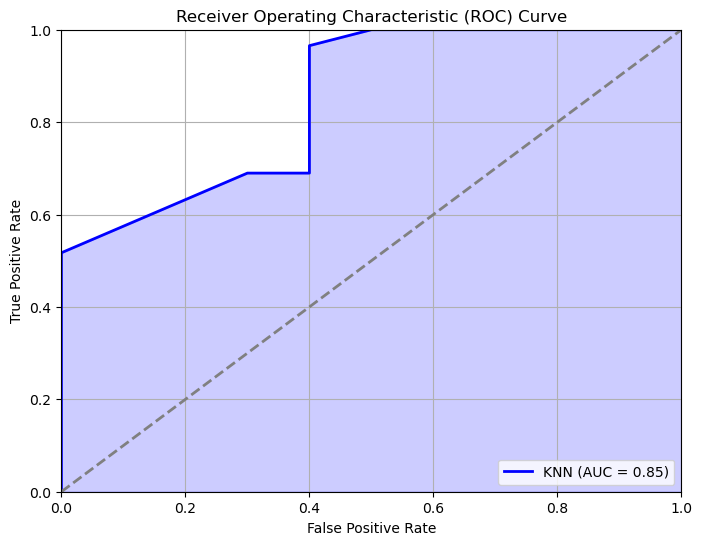

In [202]:

from sklearn.metrics import roc_curve, auc

y_scores = knn.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc))
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')  # Optional: Fill under the curve for visual emphasis
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Perform parkinson disesase dianosis using SVC alogorithm.
Use the the train and test data which are divded into stratified shuffule split.
Use different C, gamma and kernel hyper paramters and find the best paramteters.
Implement GridSearch cross validation

In [270]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(class_weight='balanced', probability=True, random_state=42)

# Defining hyperparameters for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Implementing GridSearchCV to find the best hyperparameters
grid = GridSearchCV(svm, param_grid, refit=True, cv=5, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# Best Parameters from GridSearch
print("Best Hyperparameters:", grid.best_params_)

# Step 5: Train the best SVM model from GridSearchCV
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [272]:
# SVC Accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.9487179487179487


The metrics—Precision, Recall, and F1-Score—are calculated for the Support Vector Machine (SVM) model, and the confusion matrix along with the classification report are generated to evaluate its performance comprehensively.

In [274]:
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-Score: {svm_f1:.2f}")

# Confusion Matrix and Classification Report
svm_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", svm_cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Precision: 0.95
Recall: 0.95
F1-Score: 0.95
Confusion Matrix:
 [[ 9  1]
 [ 1 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



The code snippet visualizes the SVC model's confusion matrix using a heatmap generated with Seaborn and Matplotlib. The heatmap annotates the matrix values for easy interpretation, where the cells represent true positives, true negatives, false positives, and false negatives.

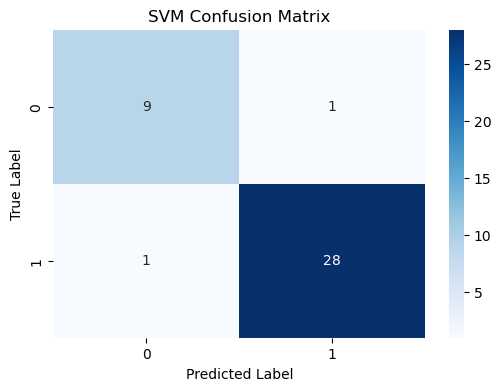

In [276]:
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The ROC-AUC curve for the Support Vector Classificer (SVC) classifier illustrates the trade-off between the false positive rate and true positive rate, with an area under the curve (AUC), indicating the model's performance in distinguishing between the positive and negative classes.

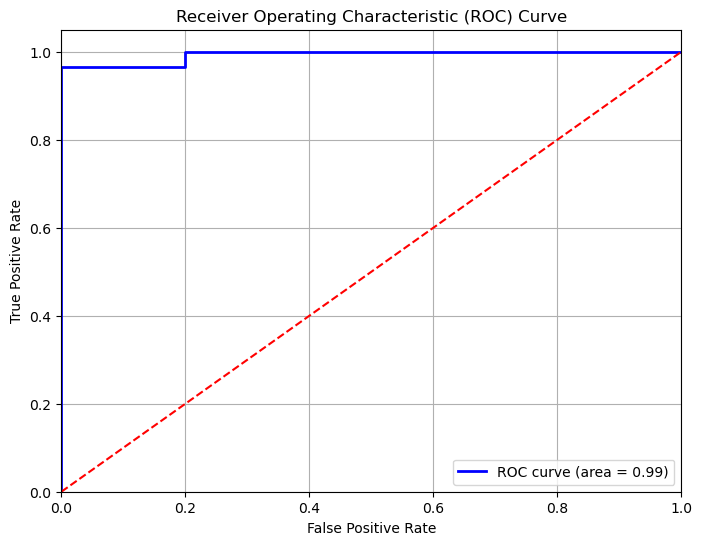

In [280]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class
y_scores = best_svm.predict_proba(X_test)[:, 1]

# Step 7: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Step 8: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



The bar chart visually compares the performance metrics—Accuracy, Precision, Recall, and F1-Score—of the K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) models, highlighting their respective scores for an insightful analysis.

However, the ROC-AUC analysis revealed that SVC has a distinct advantage over KNN, with an AUC of 0.99 compared to KNN's 0.85, indicating that SVC provides superior classification performance across various decision thresholds. This makes SVC a more reliable option in scenarios where confidence in predictions across different thresholds is necessary.

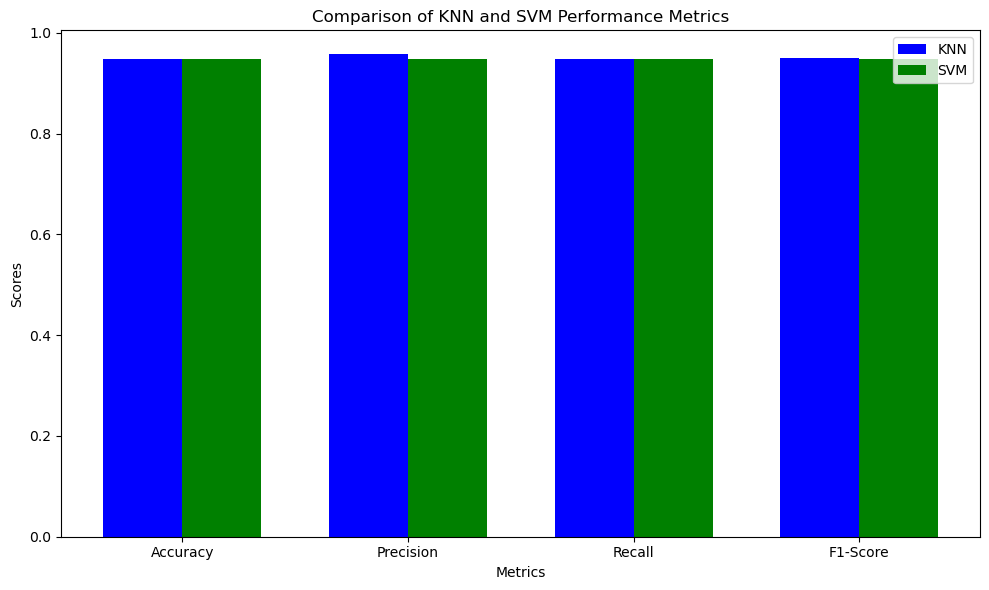

In [278]:
# Plotting the metrics for comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Plot bars for KNN and SVM metrics
knn_bar = ax.bar(x - bar_width / 2, knn_scores, bar_width, label='KNN', color='blue')
svm_bar = ax.bar(x + bar_width / 2, svm_scores, bar_width, label='SVM', color='green')

# Labels and titles
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of KNN and SVM Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

